<a href="https://colab.research.google.com/github/umpozzobom/portfolio_projetos/blob/main/Bootcamp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from google import colab as cl

In [23]:
import pickle


import numpy    as np
import seaborn  as sns

from matplotlib import pyplot as plt

#Supressão de Notação Científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.3f}'.format)

#Corrigir Gráficos Jupter
from matplotlib import pyplot as plt
from IPython.core.display import HTML

def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]

plt.rcParams['font.size'] = 24
display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )

jupyter_settings()

In [24]:
file_upload = cl.files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019 (1).csv


In [25]:
df = pd.read_csv("AB_NYC_2019.csv")

In [26]:
df1 = df.copy()

In [27]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0


In [28]:
df1.shape

(48895, 16)

In [29]:
df1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [30]:
#Utilizou para ver os ISNA presente para saber se trata ou não

df1.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

TRATAMENTO DE DADOS QUE SERÃO UTILIZADOS;

Em last_review -> é um objeto -> dados; e optou por preencher NA em média

In [31]:
# Convertendo last_review usaod pd.to_datetime

df1['last_review'] = pd.to_datetime(df1['last_review'])




In [74]:
#media = pd.DataFrame(df1.apply(np.mean)).T
#mediana = pd.DataFrame(df1.apply(np.median)).T
np.mean(df1["reviews_per_month"])
#np.median(data_raw['reviews_per_month'])

1.3732214298586618

In [77]:
aux = df1.dropna()

In [78]:
np.median(aux['reviews_per_month'])

0.72

In [80]:
media = np.mean(df1["reviews_per_month"])
df1['reviews_per_month'].fillna(media, inplace=True )

In [81]:
df1.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [82]:
df1.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [34]:
def estatistica_descritiva(df1):

# Medidas de tendência central - Mean, Median

    media = pd.DataFrame(df1.apply(np.mean)).T
    mediana = pd.DataFrame(df1.apply(np.median)).T

# Medidas de Dispersão - Std, min, max, range, skew, kurtosis
    desvio_padrao = pd.DataFrame(df1.apply(np.std)).T
    minimo = pd.DataFrame(df1.apply(np.min)).T
    maximo = pd.DataFrame(df1.apply(np.max)).T
    range = pd.DataFrame(df1.apply(lambda x : x.max() - x.min())).T
    assimetria = pd.DataFrame(df1.apply(lambda x : x.skew())).T
    curtosis = pd.DataFrame(df1.apply(lambda x : x.kurtosis())).T

    estatistica = pd.concat([minimo, maximo, range, media, mediana, desvio_padrao, assimetria, curtosis]).T.reset_index()
    estatistica.columns = ['variaveis','minimo', 'maximo', 'range', 'media', 'mediana', 'desvio_padrao', 'assimetria', 'curtosis']

    return estatistica

In [75]:
#estatistica = estatistica_descritiva(var_numerica)
#estatistica

NameError: ignored

In [41]:
duplicates = df1[df1.duplicated()]

if duplicates.empty:
    print("Não foram encontradas linhas duplicadas.")
else:
    print("Linhas duplicadas encontradas:")
    print(duplicates)

Não foram encontradas linhas duplicadas.


In [55]:
#1. Qual o valor médio do aluguel na cidade de Nova York?

df1['price'].mean()

152.7206871868289

In [57]:
#2. Quais os nomes das regiões que existem na cidade de Nova York

df1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [58]:
df1['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [53]:
#03. Qual o valor de aluguel mais caro?


df1['price'].max()

10000

In [43]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0


In [59]:
#4. Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?

df1['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [60]:
#5. Como é a variação dos preços ( desvio padrão ) dos imóveis em NY?

np.std(df1['price'])

240.15171391941718

In [68]:
#6. Quantos imóveis com preço acima da média e quantos abaixo da média?



TypeError: ignored

<Axes: ylabel='reviews_per_month'>

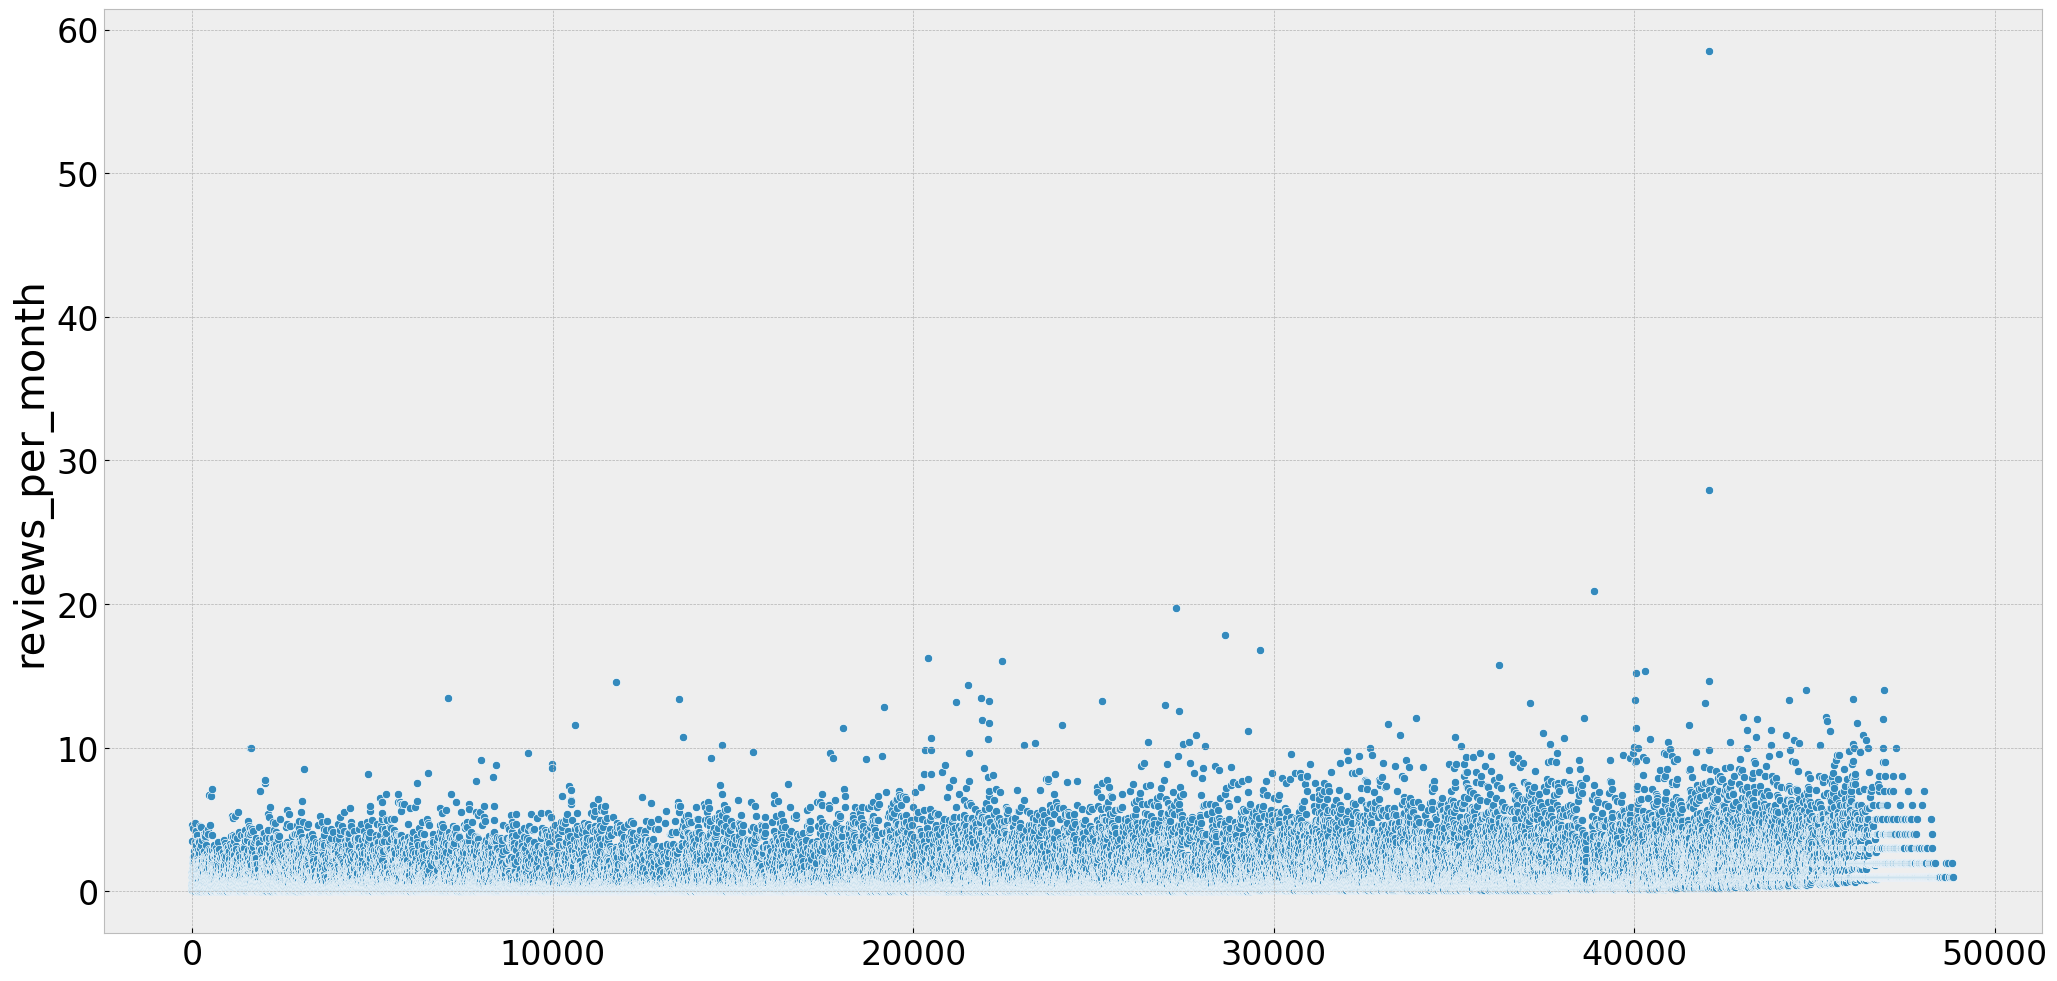

In [72]:
#7. Qual a distribuição do número de Reviews? Existem mais imóveis com muitos ou mais imóveis com poucas reviews?

sns.scatterplot(df1['reviews_per_month'])




In [85]:
#8. Qual a data mais antiga da última avaliação feita?

df1['last_review'] = pd.to_datetime(df1['last_review'])




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaT,1.373,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0


In [96]:
#8. Qual a data mais antiga da última avaliação feita?

data = df1['last_review'].sort_values(ascending = True)

data.head(1)

317   2011-03-28
Name: last_review, dtype: datetime64[ns]

In [113]:
#9. Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York ?

vizinho = list(df1['neighbourhood_group'].unique())


for condicao in vizinho:
    aluguel = df1.loc[df1['neighbourhood_group'] == condicao, 'price'].max()


    print(f'O preço para cada bairro {condicao} é {aluguel}')

O preço para cada bairro Brooklyn é 10000
O preço para cada bairro Manhattan é 10000
O preço para cada bairro Queens é 10000
O preço para cada bairro Staten Island é 5000
O preço para cada bairro Bronx é 2500


In [114]:
#10. Qual o valor médio do Tempo (dias) em que o anúncio está disponível na plataforma?

df1['availability_365'].mean()


112.78132733408324

In [121]:
#11. Desenhe o histograma do Tempo (dias) em que o anúncio está disponível na plataforma

import warnings
warnings.filterwarnings('ignore')

sns.histplot(df1['availability_365']);


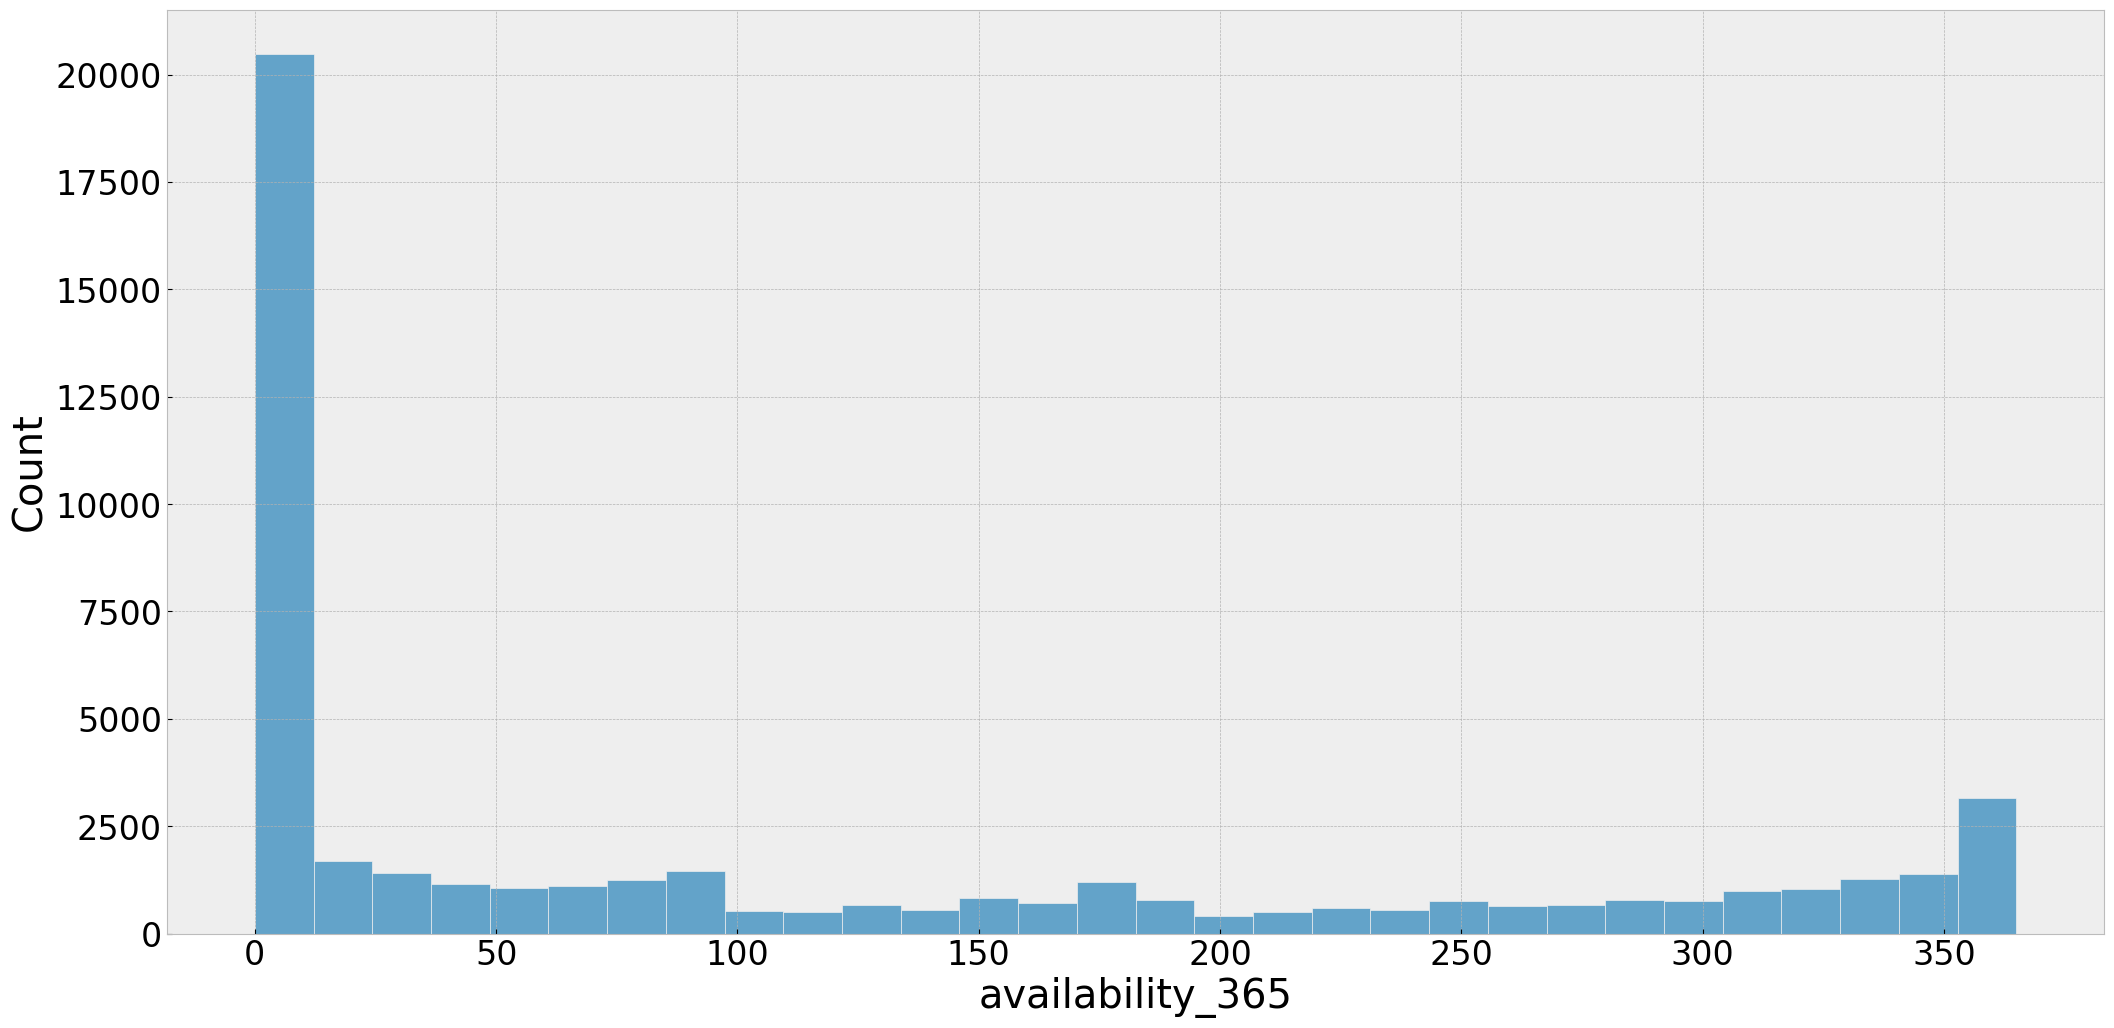

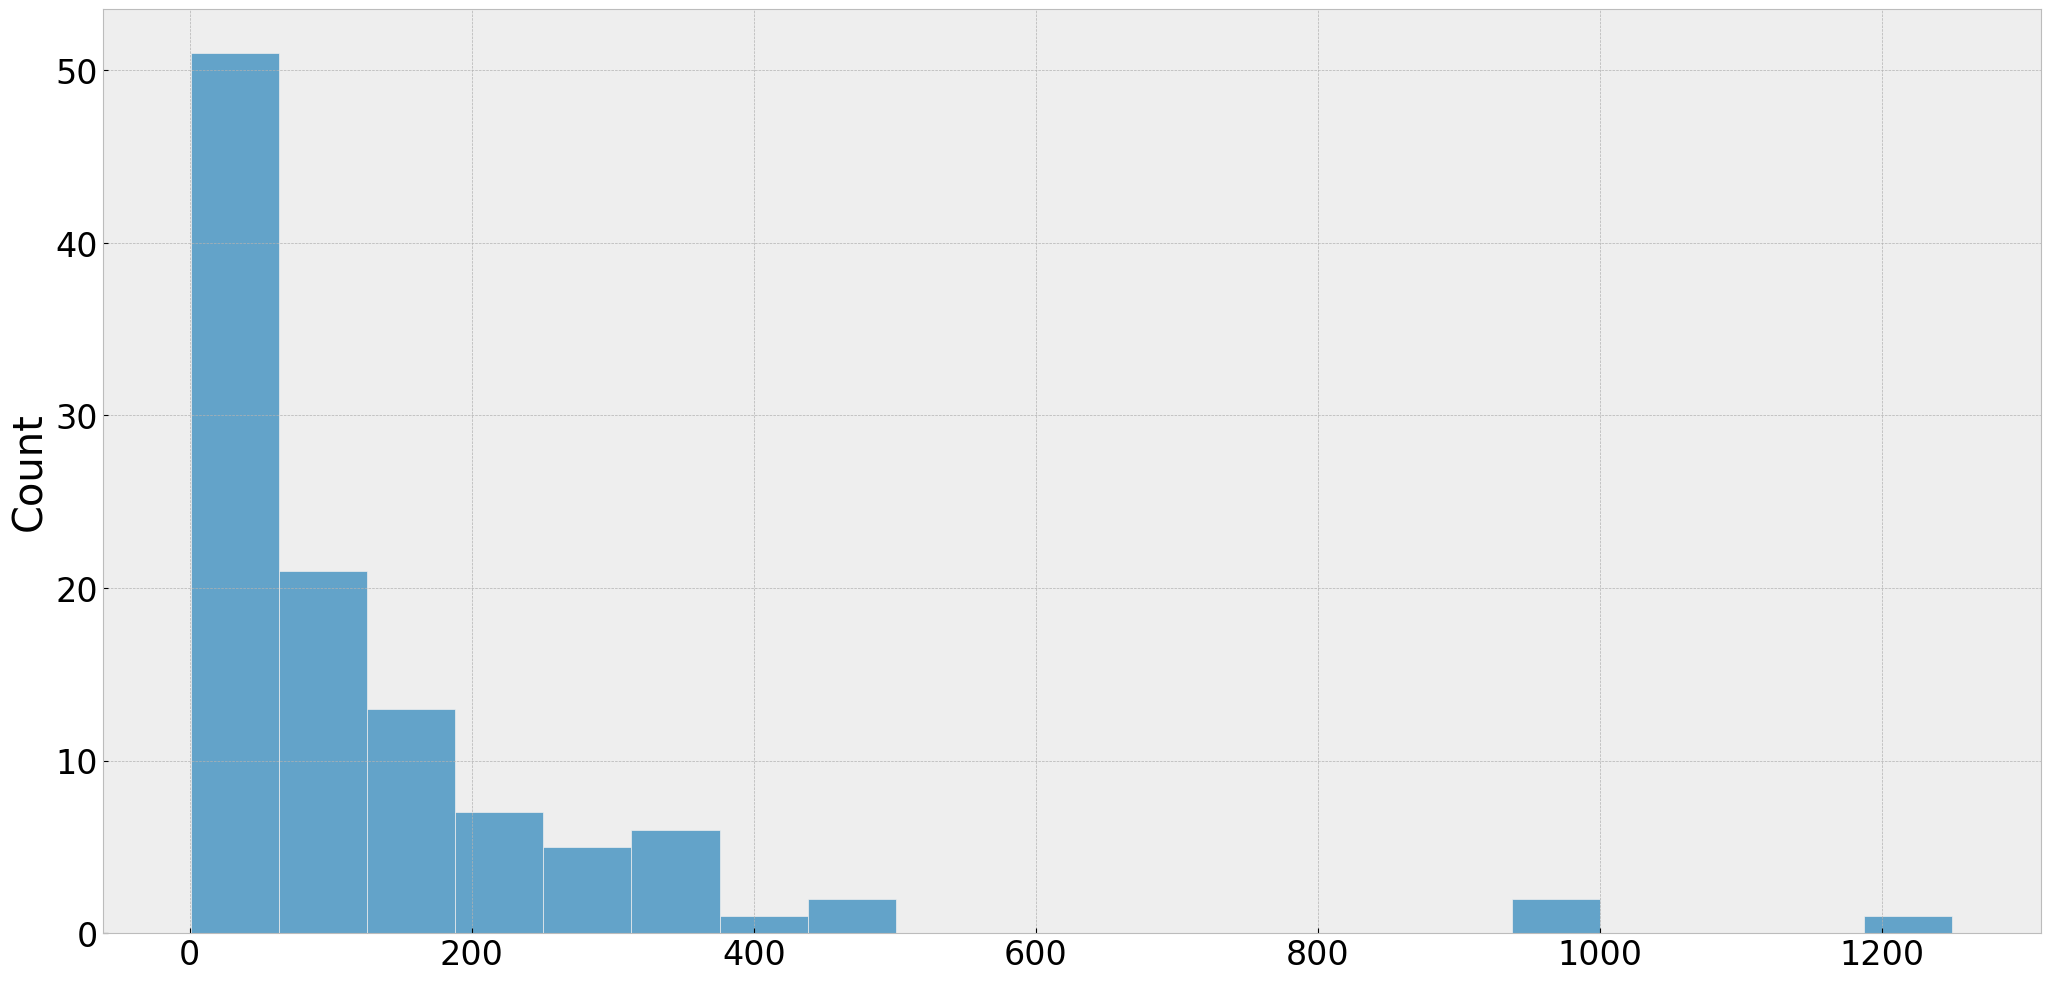

In [129]:
#12. Desenho um histograma das Diárias Mínimas para Locação.

minimo = df1['minimum_nights'].unique()

sns.histplot(minimo);


In [131]:
df1.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaT,1.373,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.748,-73.975,Entire home/apt,200,3,74,2019-06-22,0.590,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.687,-73.956,Private room,60,45,49,2017-10-05,0.400,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.765,-73.985,Private room,79,2,430,2019-06-24,3.470,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.802,-73.967,Private room,79,2,118,2017-07-21,0.990,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.713,-73.990,Entire home/apt,150,1,160,2019-06-09,1.330,4,188


In [134]:
#13. Desenhe o histograma da Quantidade de Anúncios do Host do Imóvel.



In [ ]:
#14. Desenhe um mapa da cidade de Nova York, localizando somente os top 10 imóveis com mais avaliações, por região.

import plotly.express as px


aux1 = df1.loc[df1['neighbourhood_group'] == 'Staten Island', :].sort_values(by= "neighbourhood_group",ascending=False).head(10)
aux2 = df1.loc[df1['neighbourhood_group'] == 'Queens', :].sort_values(by= "neighbourhood_group",ascending=False).head(10)
aux3 = df1.loc[df1['neighbourhood_group'] == 'Manhattan', :].sort_values(by= "neighbourhood_group",ascending=False).head(10)
aux4 = df1.loc[df1['neighbourhood_group'] == 'Brooklyn', :].sort_values(by= "neighbourhood_group",ascending=False).head(10)
aux5 = df1.loc[df1['neighbourhood_group'] == 'Bronx', :].sort_values(by= "neighbourhood_group",ascending=False).head(10)

df_aux = pd.concat( [aux1,aux2, aux3, aux4, aux5] ).reset_index(drop=True)
df_aux
df_aux = pd.concat( [aux1,aux2, aux3, aux4, aux5] ).reset_index(drop=True)
df_aux


fig = px.scatter_mapbox(df_aux,
                        lat='latitude',
                        lon='longitude',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=100,
                        zoom=10)


fig.update_layout(mapbox_style="stamen-toner")
fig.update_layout(height=450, margin={"r":0,"t":0,"l":0,"b":0})

In [ ]:
#15. Desenhe um mapa da cidade de Nova York, localizando somente os top 50 maiores preços.


In [ ]:
#16. Desenhe um mapa da cidade de Nova York, localizando somente os top 10 menores preços, por região.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

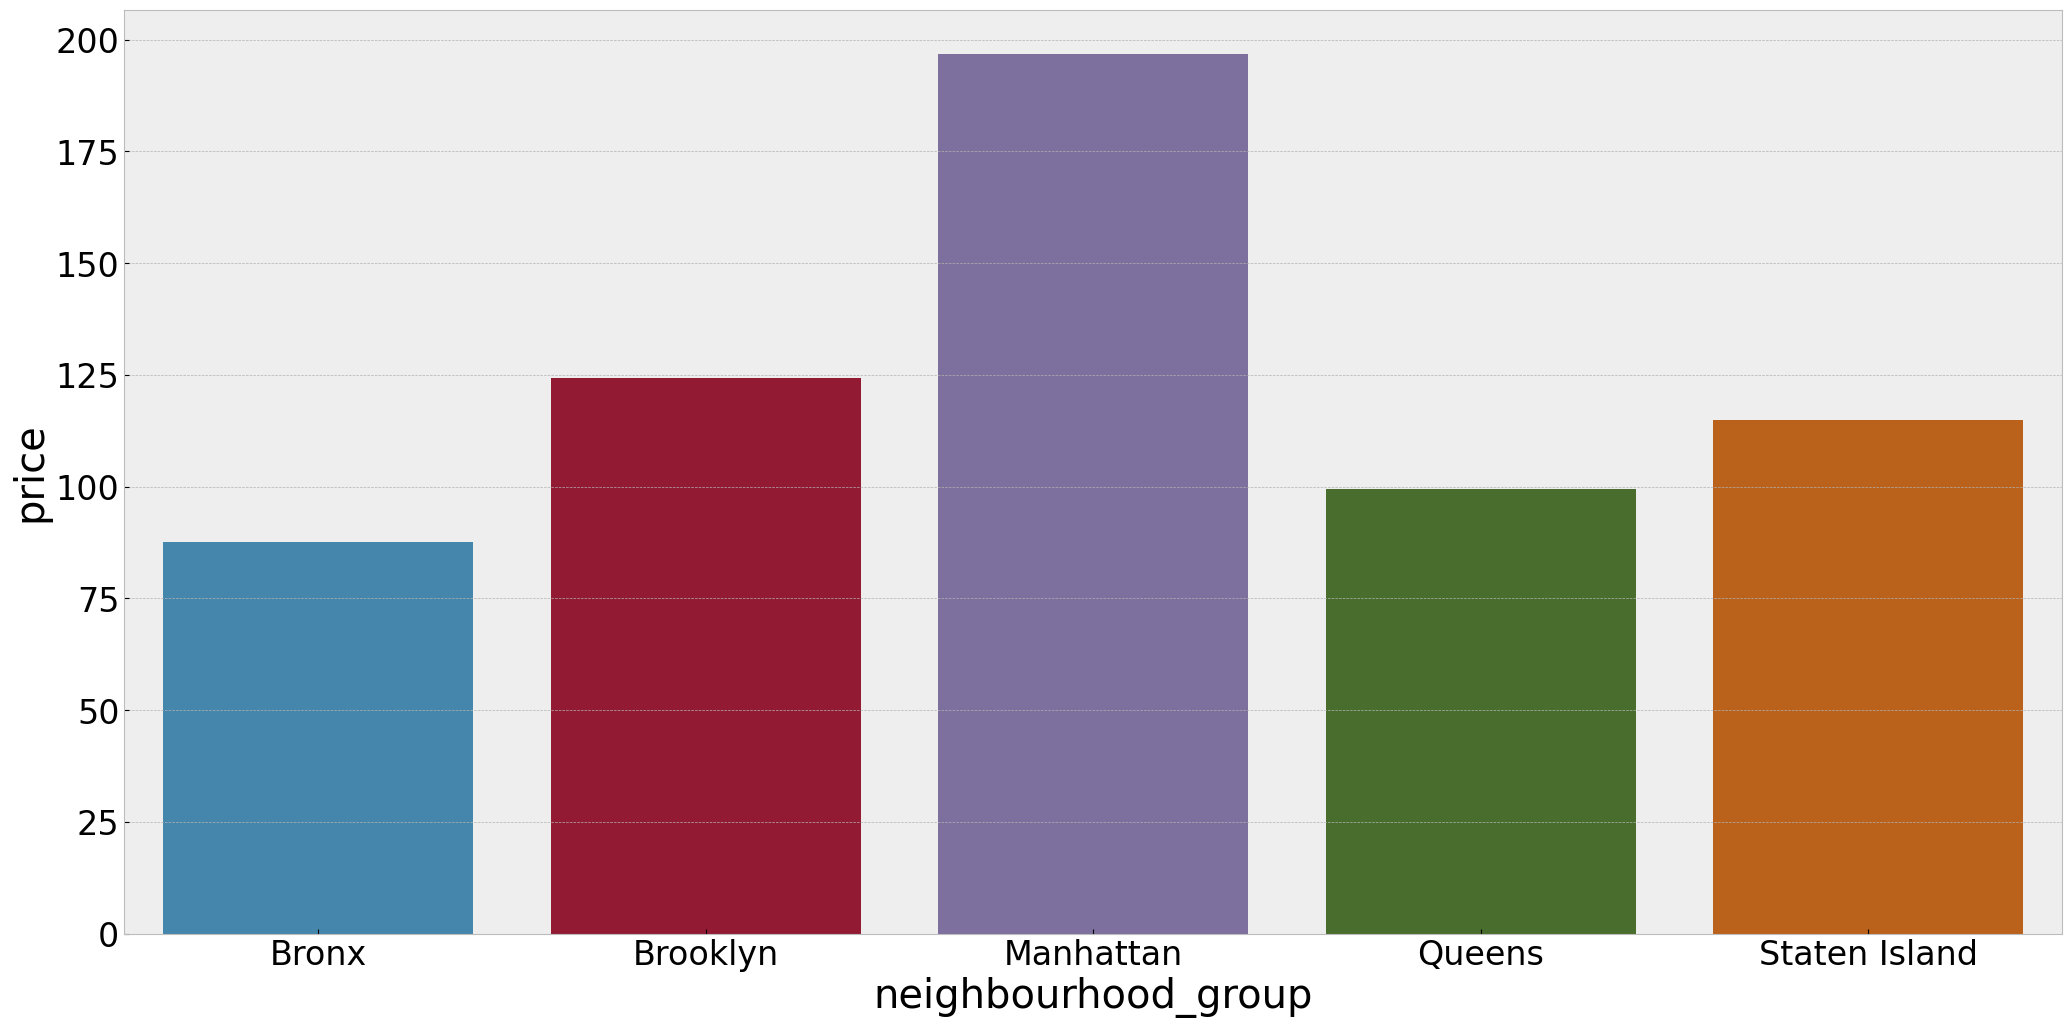

In [157]:
#17. Desenhe um gráfico de barras, mostrando a média de aluguel diária de cada região.

q_17 = df1[["neighbourhood_group", "price"]].groupby("neighbourhood_group").mean().sort_values(by= "neighbourhood_group").reset_index()
sns.barplot(data = q_17, y="price", x= "neighbourhood_group")



<Axes: xlabel='neighbourhood_group', ylabel='price'>

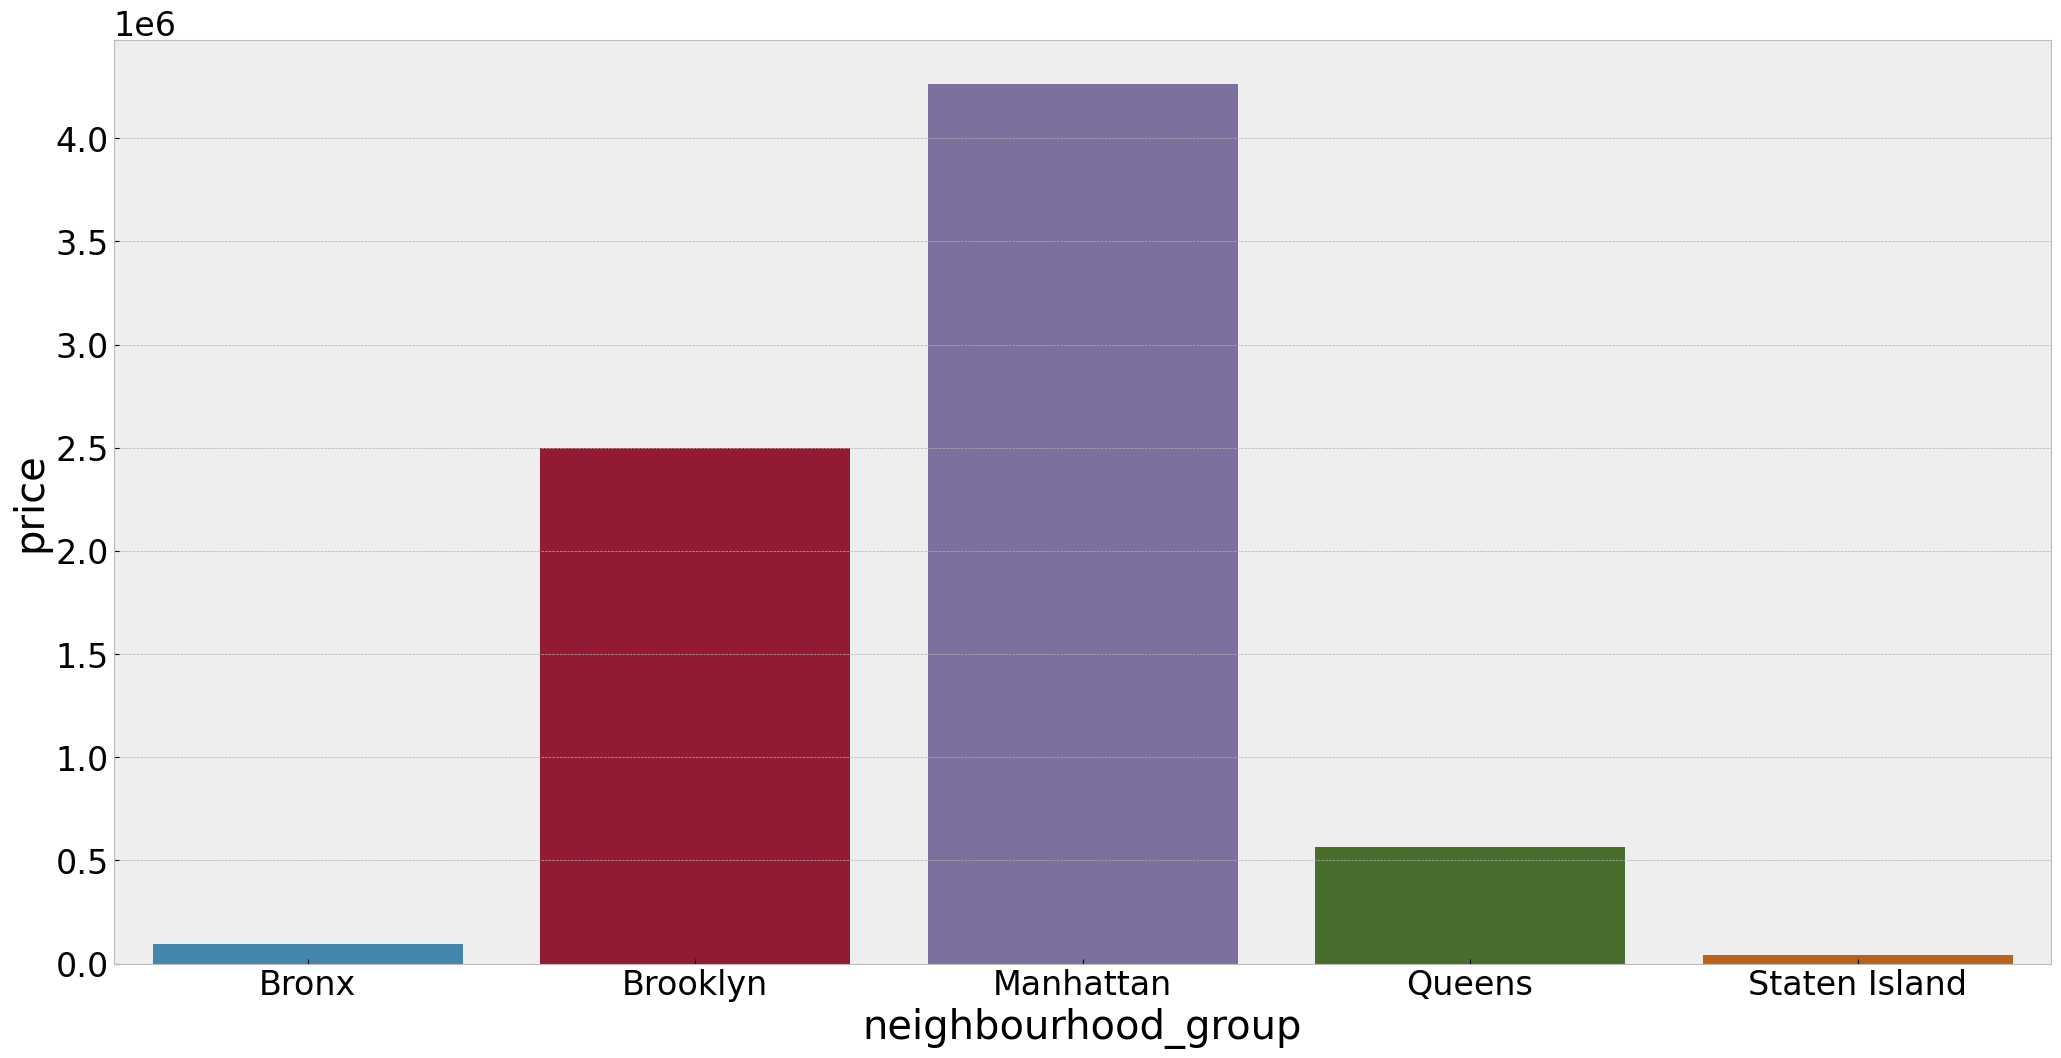

In [160]:
#19. Desenhe um gráfico de barras, mostrando a soma de todos os valores da diária de cada região.

q_17 = df1[["neighbourhood_group", "price"]].groupby("neighbourhood_group").sum().sort_values(by= "neighbourhood_group").reset_index()
sns.barplot(data = q_17, y="price", x= "neighbourhood_group")

In [194]:
#19. Desenhe um gráfico de barras, mostrando a soma de todos os valores da diária de cada região.



KeyError: ignored

<Axes: xlabel='neighbourhood_group', ylabel='price'>

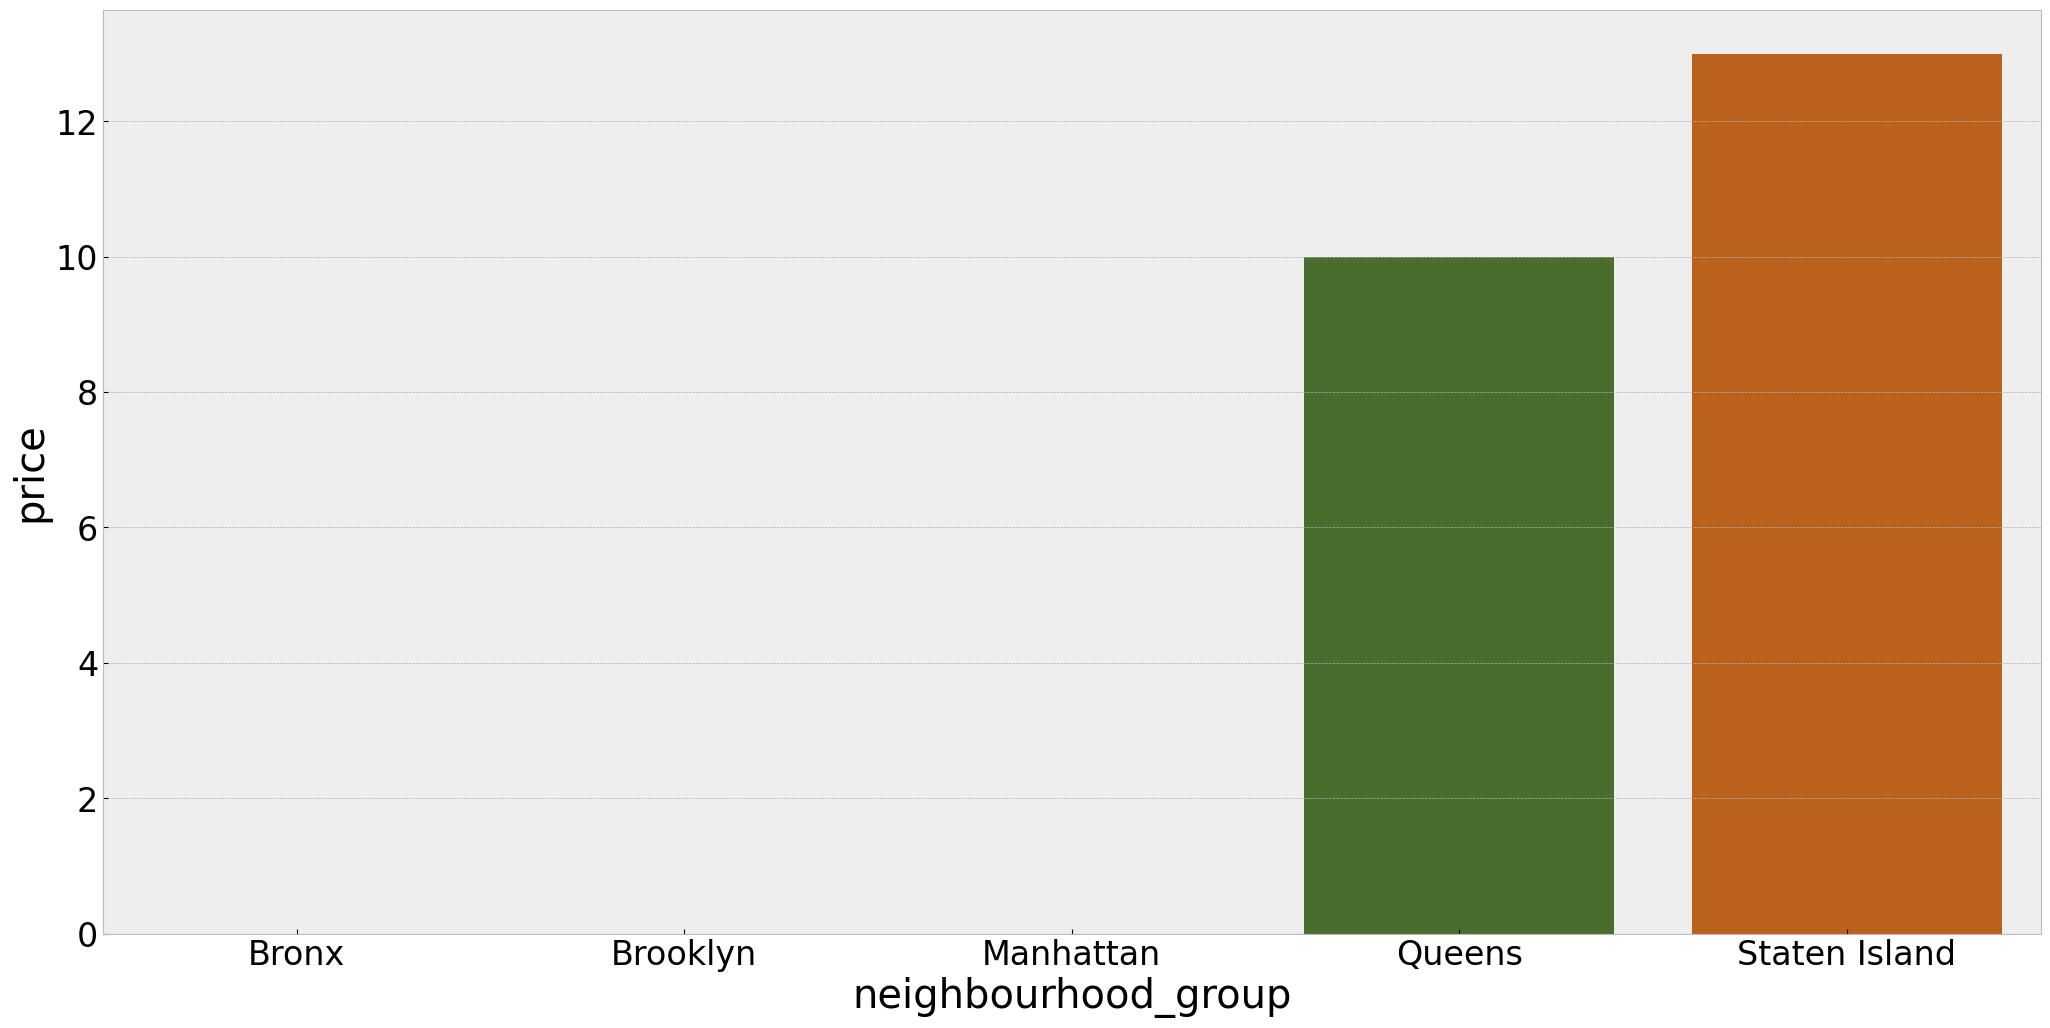

In [164]:
#20. Desenhe um gráfico de barras, mostrando o menor valor de diária de cada região.

q_17 = df1[["neighbourhood_group", "price"]].groupby("neighbourhood_group").min().sort_values(by= "neighbourhood_group").reset_index()
sns.barplot(data = q_17, y="price", x= "neighbourhood_group")